# Lab 10-1 MNIST with CNN (Keras)
* MNIST(Modified National Institute of Standards and Technology database)는 0~9까지의 손으로 쓴 숫자들로 이루어진 대형 데이터베이스
* Optimizer 비교 

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.2.0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Visualize training results
# 네트워크 학습후 결과를 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(training_epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [5]:
model = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

### Tensorflow 2.0 버전에 맞게 Keras를 활용한 MNIST를 분류 모델 생성

### Hyper Parameters

In [6]:
learning_rate = 0.01
training_epochs = 5
batch_size = 100

tf.random.set_seed(777)

### Datasets

11493376/11490434 [==============================] - 0s 0us/step


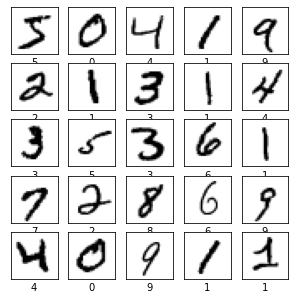

In [7]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

###  Tensorflow Keras
#### 위 Data를 기준으로 CNN분류 모델 생성
* Tensorflow keras API를 통해 모델에 대한 정의

* (1)Adam Optimizer

In [8]:
model1 = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [9]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history1 = model1.fit(train_images, train_labels,epochs=training_epochs) #batch_size = 32 default


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1134 - accuracy: 0.9647
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0390 - accuracy: 0.9873
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0194 - accuracy: 0.9941
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0155 - accuracy: 0.9951


In [11]:
history11 = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=batch_size, epochs=training_epochs)


Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0238 - val_accuracy: 0.9939
Epoch 2/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0238 - val_accuracy: 0.9934
Epoch 3/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0280 - val_accuracy: 0.9928
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0269 - val_accuracy: 0.9933
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.0388 - val_accuracy: 0.9922


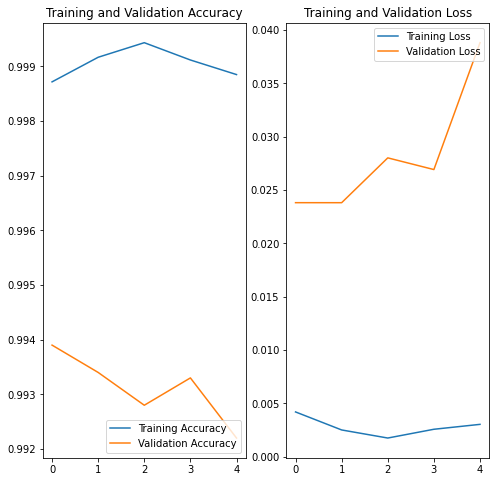

In [12]:
plot_history(history11)

* (2)SGD Optimizer

In [13]:
model2 = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [14]:
model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history2 = model2.fit(train_images, train_labels, epochs=training_epochs)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5174 - accuracy: 0.8484
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1481 - accuracy: 0.9542
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1021 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0804 - accuracy: 0.9752
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - accuracy: 0.9789


In [16]:
history22 = model2.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=batch_size, epochs=training_epochs)


Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0456 - val_accuracy: 0.9849
Epoch 2/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.0425 - val_accuracy: 0.9864
Epoch 3/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0435 - val_accuracy: 0.9849
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0401 - val_accuracy: 0.9868
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0400 - val_accuracy: 0.9867


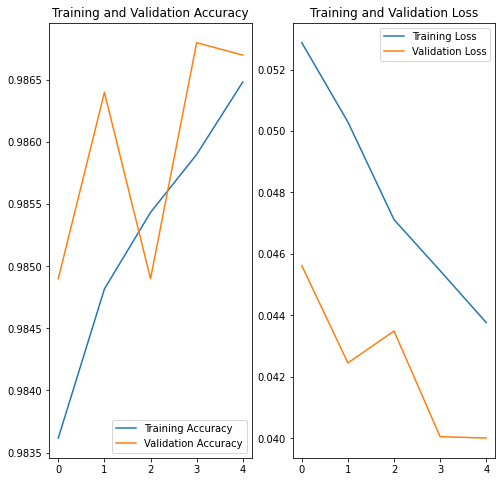

In [17]:
plot_history(history22)

* (3)RMSprop Optimizer

In [18]:
model3 = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [19]:
model3.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history3 = model3.fit(train_images, train_labels,  epochs=training_epochs)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1080 - accuracy: 0.9661
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0436 - accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0341 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0303 - accuracy: 0.9914
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0253 - accuracy: 0.9928


In [21]:
history33 = model3.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=batch_size, epochs=training_epochs)


Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0166 - accuracy: 0.9952 - val_loss: 0.0275 - val_accuracy: 0.9909
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0323 - val_accuracy: 0.9913
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.0291 - val_accuracy: 0.9914
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0280 - val_accuracy: 0.9936
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.0280 - val_accuracy: 0.9930


## Visualize training results

#### 네트워크 학습후 결과를 시각화

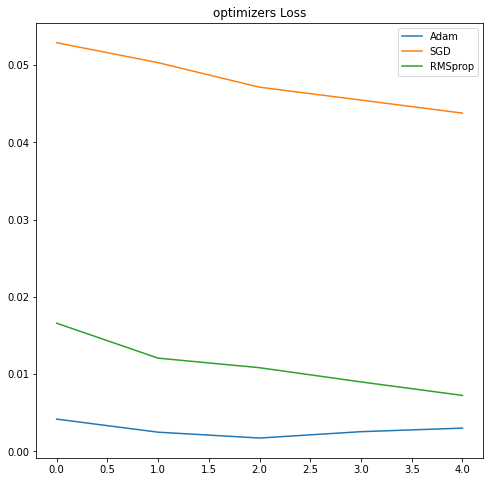

In [22]:

loss1=history11.history['loss']
loss2=history22.history['loss']
loss3=history33.history['loss']

epochs_range = range(training_epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss1, label='Adam')
plt.plot(epochs_range, loss2, label='SGD')
plt.plot(epochs_range, loss3, label='RMSprop')
plt.legend(loc='upper right')
plt.title('optimizers Loss')
plt.show()

In [23]:
model4 = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [24]:
model4.compile(optimizer='Adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history44 = model4.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=batch_size, epochs=training_epochs)


Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 0.3572 - accuracy: 0.8982 - val_loss: 0.1853 - val_accuracy: 0.9471
Epoch 2/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1808 - accuracy: 0.9467 - val_loss: 0.1364 - val_accuracy: 0.9592
Epoch 3/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1443 - accuracy: 0.9571 - val_loss: 0.1136 - val_accuracy: 0.9668
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1233 - accuracy: 0.9636 - val_loss: 0.0985 - val_accuracy: 0.9696
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1099 - accuracy: 0.9679 - val_loss: 0.0884 - val_accuracy: 0.9730


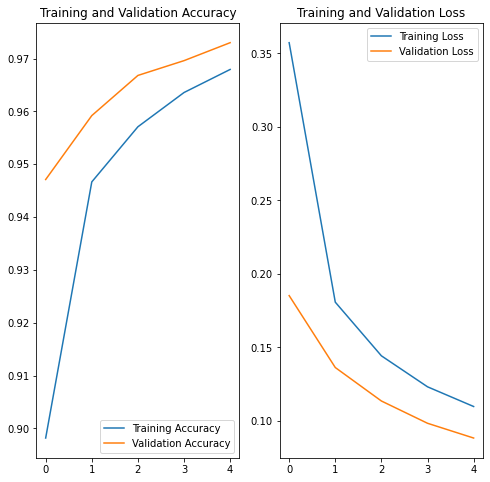

In [26]:
plot_history(history44)

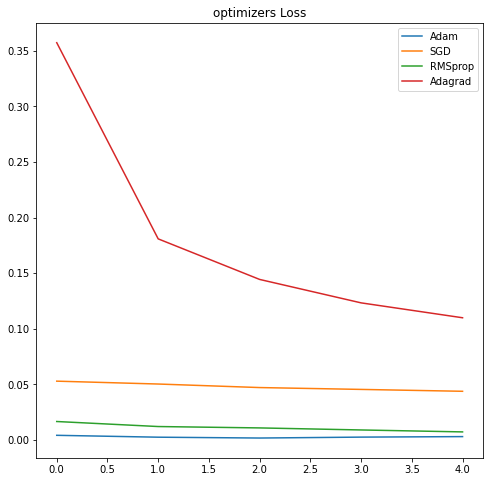

In [27]:

loss1=history11.history['loss']
loss2=history22.history['loss']
loss3=history33.history['loss']
loss4=history44.history['loss']

epochs_range = range(training_epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss1, label='Adam')
plt.plot(epochs_range, loss2, label='SGD')
plt.plot(epochs_range, loss3, label='RMSprop')
plt.plot(epochs_range, loss4, label='Adagrad')
plt.legend(loc='upper right')
plt.title('optimizers Loss')
plt.show()

In [28]:
#model save
# 전체 모델을 HDF5 파일로 저장합니다.
path = '/content/drive/My Drive/DeepLearning/model/'
model1.save(path+'MNIST_adam.h5')  # creates a HDF5 file 'MNIST_adam.h5'
model2.save(path+'MNIST_sgd.h5')  
model3.save(path+'MNIST_RMSp.h5')  
model4.save(path+'MNIST_Adagrad.h5')  